In [1]:
import sympy as syms
import numpy as np
import math

from sympy import * # For basic mathematical operations
syms.init_printing()
from sympy import symbols
from sympy import Matrix
from sympy.matrices import eye, zeros, ones, Identity # Special matrices (eye creates explicit matrix, Identity creates matrix expression)
from sympy import latex
from sympy import solve
from sympy import trigsimp # For simplifying trigonometric identities
from sympy.simplify.fu import fu # For simplifying trigonometric identities (Hongguang Fu's Trigonometric Simplification)
from sympy import Function # For expressing functions of time
from sympy import expand, factor # For expanding/factoring expressions
from sympy import Eq # For writing equations

# Problem Description

![sys](Images/SingleTrackModel_AciveSuspension.jpg)


Since active hydraulic suspensions are present in the system, thus this is a **General Mechanical System**, where the system is described by its Equation of Motion and its equilibrium equation.

Since this system contains only springs and dampers, and no constraining elements, the component matrices in its linearised equations of motion can be written directly.

## Sytem Parameters

In [17]:
mv,mh,ma,Ja,lAh,lAv,cAv,kAv,cAh,kAh,cRv,kRv,cRh,kRh,ca,kav,kah,t,A = symbols('m_v m_h m_a J_a l_{Ah} l_{Av} c_{Av} k_{Av} c_{Ah} k_{Ah} c_{Rv} k_{Rv} c_{Rh} k_{Rh} c_a k_{av} k_{ah} t A')

# Generalised Coordinate
x1 = Function('x_1') # Motion of mv block
x1 = x1(t)
x1_d = Function('\dot{x_1}')
x1_d = x1_d(t)
x1_dd = Function('\ddot{x_1}')
x1_dd = x1_dd(t)
x2 = Function('x_2') # Motion of mh block
x2 = x2(t)
x2_d = Function('\dot{x_2}')
x2_d = x2_d(t)
x2_dd = Function('\ddot{x_2}')
x2_dd = x2_dd(t)
x3 = Function('x_3') # Motion of ma block
x3 = x3(t)
x3_d = Function('\dot{x_3}')
x3_d = x3_d(t)
x3_dd = Function('\ddot{x_3}')
x3_dd = x3_dd(t)
psi = Function('\psi') # Pitch Motion of Ma Block
psi = psi(t)
psi_d = Function('\dot{\psi}')
psi_d = psi_d(t)
psi_dd = Function('\ddot{\psi}')
psi_dd = psi_dd(t)

q = Matrix([[x1],[x2],[x3],[psi]])
q_d = Matrix([[x1_d],[x2_d],[x3_d],[psi_d]])
q_dd = Matrix([[x1_dd],[x2_dd],[x3_dd],[psi_dd]])

# Motions of the active suspension
xah = Function('x_{ah}')
xah = xah(t)
xav = Function('x_{av}')
xav = xav(t)
xah_d = Function('\dot{x}_{ah}')
xah_d = xah_d(t)
xav_d = Function('\dot{x}_{av}')
xav_d = xav_d(t)
z = Matrix([[xav],[xah]])
z_d = Matrix([[xav_d],[xah_d]])
q_d

# Active actuator pressures
ph = Function('p_{h}')
ph = ph(t)

pv = Function('p_{v}')
pv = pv(t)

# External Excitations
sv = Function('s_v')
sv = sv(t)

sv_d = Function('\dot{s}_v')
sv_d = sv_d(t)

sh = Function('s_h')
sh = sh(t)

sh_d = Function('\dot{s}_h')
sh_d = sh_d(t)

### Mass Matrix/ Matrix of Inertial Acceleration dependent Forces

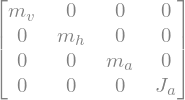

In [9]:
M = Matrix([[mv,0,0,0],[0,mh,0,0],[0,0,ma,0],[0,0,0,Ja]])
M

### Matrix of Velocity Dependent Forces

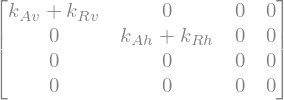

In [11]:
P = Matrix([[kAv + kRv,0,0,0],[0,kAh + kRh,0,0],[0,0,0,0],[0,0,0,0]])
P

### Matrix of Position Dependent Forces

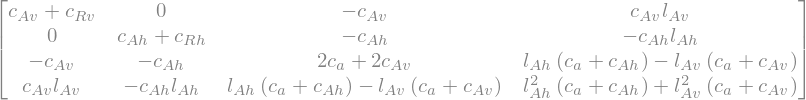

In [12]:
Q = Matrix([[cRv + cAv,0,-cAv,lAv*cAv],[0,cRh + cAh,-cAh,-lAh*cAh],[-cAv,-cAh,cAv + cAv + 2*ca,(ca + cAh)*lAh - (ca + cAv)*lAv],[lAv*cAv,-lAh*cAh,(ca + cAh)*lAh - (ca + cAv)*lAv,(ca + cAh)*(lAh**2) + (ca + cAv)*(lAv**2)]])
Q

### Matrix associated with constraint DOF Velocity

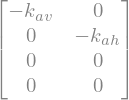

In [13]:
P_star = Matrix([[-kav,0],[0,-kah],[0,0],[0,0]])
P_star

### Matrix associated with constraint DOF Position

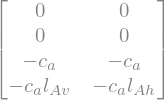

In [14]:
Q_star = Matrix([[0,0],[0,0],[-ca,-ca],[-ca*lAv,-ca*lAh]])
Q_star

### Excitation Vector (External Excitation)

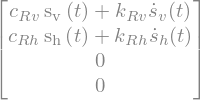

In [18]:
h = Matrix([[cRv*sv + kRv*sv_d],[cRh*sh + kRh*sh_d],[0],[0]])
h

### Equations of Motion

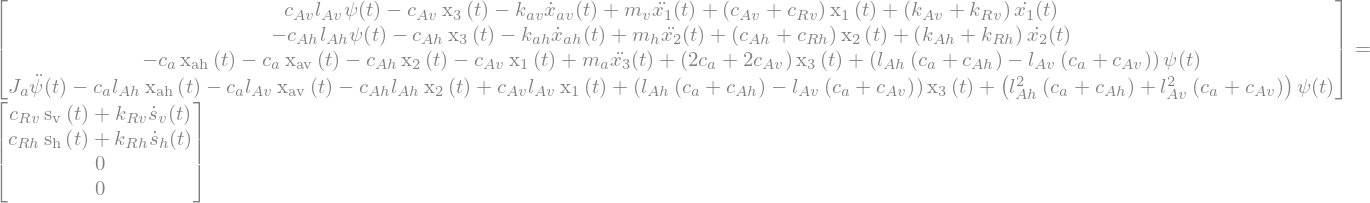

In [19]:
eom = Eq(M*q_dd + P*q_d + Q*q + P_star*z_d + Q_star*z,h)
eom

## Force Equilibrium Condition

In [20]:
forceEq1 = Eq(kav*(xav_d - x1_d) + ca*(xav - x3),pv*A)
forceEq2 = Eq(kah*(xah_d - x2_d) + ca*(xah - x3),ph*A)
forceEq1,forceEq2

### Important Matrices from the Equilibrium Condition

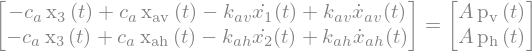

In [21]:
P_dash = Matrix([[-kav,0,0,0],[0,-kah,0,0]])
Q_dash = Matrix([[0,0,-ca,0],[0,0,-ca,0]])
P_stardash = Matrix([[kav,0],[0,kah]])
Q_stardash = Matrix([[ca,0],[0,ca]])
h_dash = Matrix([[A*pv],[A*ph]])
fEq = Eq(P_dash*q_d + Q_dash*q + P_stardash*z_d + Q_stardash*z, h_dash) # To verify the matrices
fEq

## State Space Representation

### State Vector

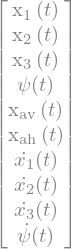

In [22]:
w = Matrix([[q],[z],[q_d]])
w

### State Velocity Vector

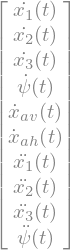

In [23]:
w_d = Matrix([[q_d],[z_d],[q_dd]])
w_d

### System Matrix

In [24]:
# Shape of Generalised coordinate vector (#DOF)
f = q.shape[0]
# Number of constraint DOFs
m = z.shape[0]

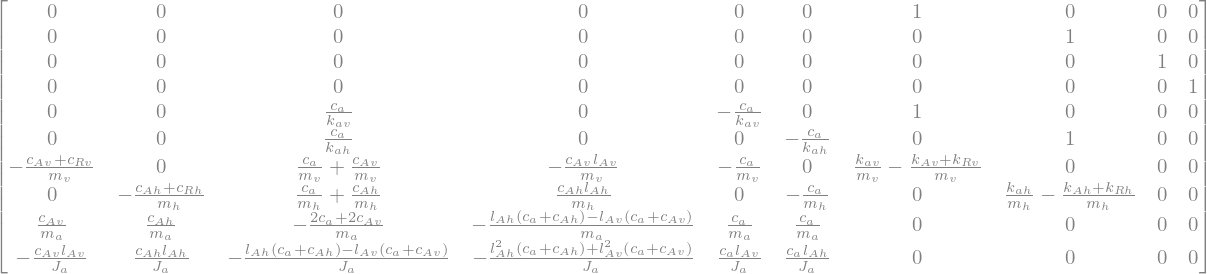

In [25]:
A = Matrix([[zeros(f),zeros(f,m),eye(f)],[-(P_stardash**-1)*Q_dash,-(P_stardash**-1)*Q_stardash,-(P_stardash**-1)*P_dash],[-(M**-1)*Q + (M**-1)*P_star*(P_stardash**-1)*Q_dash,(M**-1)*P_star*(P_stardash**-1)*Q_stardash - (M**-1)*Q_star,-(M**-1)*P + (M**-1)*P_star*(P_stardash**-1)*P_dash]])
A

### Excitation Vector (State Equation)

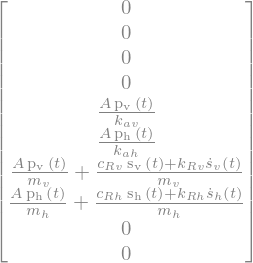

In [26]:
b = Matrix([[zeros(f,1)],[(P_stardash**-1)*h_dash],[(M**-1)*h - (M**-1)*P_star*(P_stardash**-1)*h_dash]])
b

### Final State Space Equation

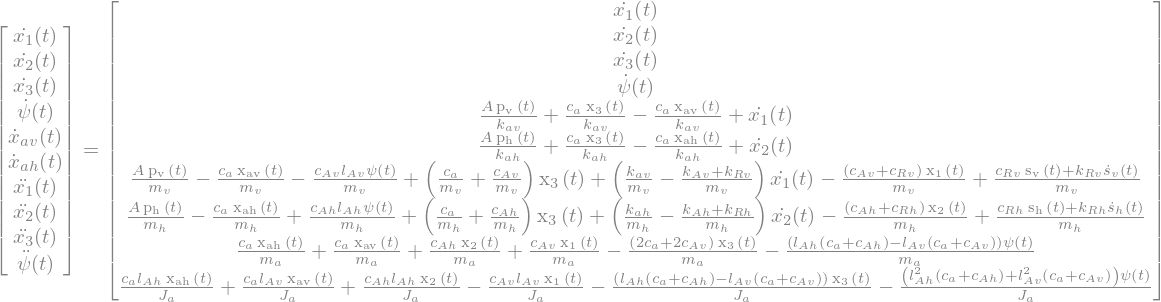

In [27]:
SSR = Eq(w_d,A*w + b)
SSR